# Locanto

Dans ce TP libre, nous allons essayer de scraper le site ivoirien [locanto](https://www.locanto.ci) . Nous allons nous intéresser aux [annonces de location de maisons](https://www.locanto.ci/Immobilier/R/?type=rent) .

# Importation des librairies

On commence par importer les librairies idoines

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [2]:
# On définit la variable qui  pointe vers le driver
driver_path = "C:/Users/NKA/Downloads/chromedriver.exe" # Saisissez le bon chemin ici

# Q1 : lancer le navigateur automatique

En se servant du module importé **webdriver**, lancez le navigateur automatique. Si tout se passe bien, vous devriez voir un navigateur s'ouvrir (**Chromme** ou **Firefox** ). Le navigateur sera appelé `driver`.

In [3]:
driver = webdriver.Chrome(executable_path= driver_path)

# Q2 : Extraction du code source

## Q2-1 Visiter la page de location de voiture sur locanto

En utilisant la méthode **driver<font color="blue">.get</font>**, naviguez à l'adresse https://www.locanto.ci/Immobilier/R/?type=rent . C'est sur cet adresse que nous pouvons accéder aux annonces de location de voiture de l'opérateur ivoirien **locanto** .

In [4]:
url = "https://www.locanto.ci/Immobilier/R/?type=rent"

driver.get( url ) # Remplacer les "...." par la bonne variabe

# Q2-2 : Extraire le code source de la page

Définissez une variable `page`qui contient le code source de la page.

In [5]:
page = driver.page_source

# Q3 : Extraire toutes les lignes de la table

En vous servant de votre navigateur, trouvez un sélecteur css qui caractérise  une ligne. On appellera ce sélecteur `row_css`.

In [6]:
soup = BeautifulSoup(page)
# row_css = ".resultRow" # Mettez le bonne classe 
row_css = "[id^='resultRow']"
rows = soup.select(row_css)
print("Le nombre de lignes sur la première page est: ", len(rows))

Le nombre de lignes sur la première page est:  24


# Q4 : Extraction d'une ligne

## Q4-1 Prendre une ligne quelconque
Définissez une variable `row`qui représente une ligne quelconque (servez-vous de la variable `rows`). Nous allons nous servir de cette variable pour extraire les informations importantes d'une ligne.

In [7]:
row = rows[0] # Prenez une ligne quelconque, la 1ère, la 2ème, la dernière ...

En effet, une ligne contient plusieurs informations plus ou moins importantes.
* Une **image** de l'immeuble (nous ommettrons ces images)
* Un **titre** d'annonce (exemple: "**Appart 2p a louer Riviera bonoumin**" )
* La **ville** où  se trouve l'immeuble (exemple:  "**Abidjan**")
* Le **prix** en cfa de l'immeuble (expemple: **90,000 CFA**)
* Une **description** textuelle de l'annonce (exemple: "**Appartement de 2pieces a lieu a la Riviera bonoumin non loin d'Abidjan mall. Ch,salon, cuisine, placards,2dch WC,propre .**" )
* Un **pied** de carte qui varie selon le type de l'immeuble concerné par l'annonce : appartement, maison... Un exemple de pied de carte est "**Location appartement Abidjan**"

## Q4-2  Extraire le titre et la ville

Copiez coller ce sélecteur css `.resultMain .textHeader .bp_ad__title_link` dans votre navigateur. Normalement le premier en-tête de toutes les cartes devraient être pris.

In [8]:
header1_css = ".resultMain .textHeader .bp_ad__title_link"
header1 = row.select_one(header1_css)
print(header1)

<a class="bp_ad__title_link" href="https://abidjan.locanto.ci/ID_4180312322/EN-LOCATION-RIVIERA-3-WORLD-CITY-VILLA-DUPLEX-DE-5-PIECES.html">EN LOCATION RIVIERA 3 WORLD CITY VILLA …<div class="bp_ad__city smallgray"><svg class="ysvg" style="width: 10px; height:10px"><use xlink:href="/assets/200116_111106/images/bg/icons/sprites/mobile/main/sprite.svg#pin"></use></svg>Abidjan</div></a>


**Question**: Comment récupéreriez-vous le titre de l'annonce (servez-vous de la variable `header1`) ?

In [9]:
titre = header1.text # Ecrivez dans cette case le code qu'il faut pour extraire le titre d'une annonce

In [11]:
print("Le titre est:", titre)

Le titre est: EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan


**Question**: Comment récupéreriez-vous la ville (servez-vous de la variable `header1`)?

In [18]:
ville_css = ".bp_ad__city"
ville = header1.select_one(ville_css).text # Ecrivez le code qui permet d'extraire la ville, et stockez le résultat dans la variable `ville`

In [19]:
print("La ville est :", ville)

La ville est : Abidjan


## Q4-3 : Extraire le prix

Trouvez une manière de sélectionner le prix de l'annonce.

In [20]:
price_css = ".bp_ad__price" # Complétez le sélecteur

In [22]:
price = row.select_one(price_css).text
print("Le prix est :", price)

Le prix est : 1,500,000 CFA


## Q4-4 : Extraire la description

En procédant de la même manière que précédemment (n'hésitez pas à  stocker votre sélecteur css dans une variable), extrayez la description de l'annonce et stockez-la dans la variable `description` .

In [26]:
description_css = ".textDesc" # Ecrivez le code qui permet d'extraire la description ici
description  = row.select_one(description_css).text

In [28]:
print("la description de la page est :", description)

la description de la page est : EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLEX DE 5 PIÈCES.
Zone : dans la Cité : World City ,pas loin du Lycée Français .
Un Salon + une salle a Mangé .
Une grande Cuisine .
4 …


## Q4-5 : Extraire le pied de carte

En procédant de la même manière que précédemment (n'hésitez pas à  stocker votre sélecteur css dans une variable), extrayez le pied  de carte et stockez-le dans la variable `type_loaction` .

In [31]:
type_loaction_css = ".bp_ad__footer"
type_loaction = row.select_one(type_loaction_css).text

In [32]:
print("Le type de la location est:", type_loaction)

Le type de la location est: Location maison Abidjan


## Q4-6 : Extraire la ligne en entier

En vous servant des questions précédentes, excrire une fonction `get_row` qui extrait toutes les informations d'une ligne.

In [42]:
def get_text(element, css):
    tag = element.select_one(css)
    text = tag.text if tag else None
    return text

In [45]:
def get_row(row):
    titre_css = ".resultMain .textHeader .bp_ad__title_link"
    titre = get_text(row, titre_css) 
    
    ville_css = ".bp_ad__city"
    ville = get_text(row, ville_css)
    
    price_css = ".bp_ad__price" # Complétez le sélecteur
    price = get_text(row, price_css)
#     price =  price.text if price  else None
    
    description_css = ".textDesc" 
    description  = get_text(row, description_css)
    
    type_loaction_css = ".bp_ad__footer"
    type_loaction = get_text(row, type_loaction_css )
    
    return {"titre":titre, "ville":ville, "price":price, 
            "description":description, "type_loaction":type_loaction }

In [46]:
print("Un exemple de ligne est:\n\n", get_row(row))

Un exemple de ligne est:

 {'titre': 'EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan', 'ville': 'Abidjan', 'price': '1,500,000 CFA', 'description': 'EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLEX DE 5 PIÈCES.\nZone : dans la Cité : World City ,pas loin du Lycée Français .\nUn Salon + une salle a Mangé .\nUne grande Cuisine .\n4 …', 'type_loaction': 'Location maison Abidjan'}


## Q5 : Extraire toutes les annonces d'une page

En se servant de la fonction `get_row` définie précédemment, définissez une fonction `get_locanto`qui récupère toutes les lignes présentes sur la page (vous pouvez ajoutez un `try...except` pour gérer les erreurs).

In [51]:
def get_locanto():
    data = [get_row(row) for row in rows]
    return data

In [52]:
data = get_locanto()
data[:3]

[{'titre': 'EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan',
  'ville': 'Abidjan',
  'price': '1,500,000 CFA',
  'description': 'EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLEX DE 5 PIÈCES.\nZone : dans la Cité : World City ,pas loin du Lycée Français .\nUn Salon + une salle a Mangé .\nUne grande Cuisine .\n4 …',
  'type_loaction': 'Location maison Abidjan'},
 {'titre': 'Chambre avec salon commum à MARCORYAbidjan',
  'ville': 'Abidjan',
  'price': '40,000 CFA',
  'description': 'chambre (entrée couché),salon commun à Marcory vers Massarana\nCondition :célibataire homme ou femme\n04 mois seulement\n07202626\n76432626',
  'type_loaction': 'Location appartement Abidjan'},
 {'titre': 'colocationCocody',
  'ville': 'Cocody',
  'price': None,
  'description': 'Je recherche une personne avec qui prendre un studio à deux d un budget 25000fr à 30000fr dans la commune de cocody riviera angré en divisant la caution demandé à deux voici mon …',
  'type_loaction': 'Colocation Abidjan'}]

In [53]:
import pandas as pd

In [56]:
pd.__version__

'0.25.1'

In [54]:
df = pd.DataFrame(data)

In [55]:
df.head(10)

,titre,ville,price,description,type_loaction
0,EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan,Abidjan,"1,500,000 CFA",EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLE...,Location maison Abidjan
1,Chambre avec salon commum à MARCORYAbidjan,Abidjan,"40,000 CFA","chambre (entrée couché),salon commun à Marcory...",Location appartement Abidjan
2,colocationCocody,Cocody,None,Je recherche une personne avec qui prendre un ...,Colocation Abidjan
3,Villa basse à louerAbidjan,Abidjan,"600,000 CFA",Villa basse 5 pièces avec garage de 3véhicules...,Location maison Abidjan
4,Duplex 4p a louer macaci 2platoAbidjan,Abidjan,"250,000 CFA",Duplex de 4pieces a louer située au 2plateaux ...,Location maison Abidjan
5,Beau duplex a louéAbidjan,Abidjan,3 CFA,Beau Duplex haut standing de 7pieces avec pici...,Location maison Abidjan
6,grand et bel appart 4 pièces déjà meublé a lou...,Abidjan,"850,000 CFA",nous disposons a la Riviera golf non loin de a...,Location appartement Abidjan
7,Villa duplex 17 pièces à louer angré 8ème tran...,Abidjan,"900,000 CFA",Villa duplex 17 pièces à louer angré 8ème tran...,Location maison Abidjan
8,Location de chambre à Cocody-centreAbidjan,Abidjan,"50,000 CFA","Chambre à louer à Cocody centre, derrière la C...",Location appartement Abidjan
9,Appart a louer 3p route du bateauAbidjan,Abidjan,"100,000 CFA",Appartement de 3pieces a louer route du bateau...,Location appartement Abidjan


In [61]:
df["price_clean"] = df["price"].str.lower().str.replace(",", ""
                        ).str.replace("cfa", "").str.strip()

df["price_clean"]  = pd.to_numeric(df["price_clean"] , errors="coerce")

In [62]:
df.head(10)

,titre,ville,price,description,type_loaction,price_clean
0,EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan,Abidjan,"1,500,000 CFA",EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLE...,Location maison Abidjan,1500000.0
1,Chambre avec salon commum à MARCORYAbidjan,Abidjan,"40,000 CFA","chambre (entrée couché),salon commun à Marcory...",Location appartement Abidjan,40000.0
2,colocationCocody,Cocody,None,Je recherche une personne avec qui prendre un ...,Colocation Abidjan,NaN
3,Villa basse à louerAbidjan,Abidjan,"600,000 CFA",Villa basse 5 pièces avec garage de 3véhicules...,Location maison Abidjan,600000.0
4,Duplex 4p a louer macaci 2platoAbidjan,Abidjan,"250,000 CFA",Duplex de 4pieces a louer située au 2plateaux ...,Location maison Abidjan,250000.0
5,Beau duplex a louéAbidjan,Abidjan,3 CFA,Beau Duplex haut standing de 7pieces avec pici...,Location maison Abidjan,3.0
6,grand et bel appart 4 pièces déjà meublé a lou...,Abidjan,"850,000 CFA",nous disposons a la Riviera golf non loin de a...,Location appartement Abidjan,850000.0
7,Villa duplex 17 pièces à louer angré 8ème tran...,Abidjan,"900,000 CFA",Villa duplex 17 pièces à louer angré 8ème tran...,Location maison Abidjan,900000.0
8,Location de chambre à Cocody-centreAbidjan,Abidjan,"50,000 CFA","Chambre à louer à Cocody centre, derrière la C...",Location appartement Abidjan,50000.0
9,Appart a louer 3p route du bateauAbidjan,Abidjan,"100,000 CFA",Appartement de 3pieces a louer route du bateau...,Location appartement Abidjan,100000.0


In [63]:
df[df.price_clean.isnull()]

,titre,ville,price,description,type_loaction,price_clean
2,colocationCocody,Cocody,None,Je recherche une personne avec qui prendre un ...,Colocation Abidjan,NaN


In [64]:
df.loc[2, "description"]

'Je recherche une personne avec qui prendre un studio à deux d un budget 25000fr à 30000fr dans la commune de cocody riviera angré en divisant la caution demandé à deux voici mon …'

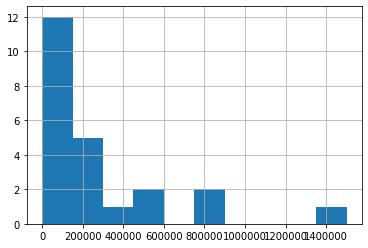

In [66]:
df.price_clean.hist()

## Q6 : Extraire toutes les annonces de Locanto

Avez-vous remarqué que **Locanto** n'affiche que les 24 premiers éléments ? Quand une page limite volontairement le nombre d'éléments à  afficher, on parle de [pagination](https://fr.ryte.com/magazine/pagination-le-guide-pratique-pour-debutants). Nous allons cliquer automatiquement pour pouvoir afficher le reste des annonces.

## Q6-1 : Sélecteur du bouton 'Suivant'
Défiler les annonces jusqu'en bas. Avez-vous vu la liste numérotée dont les numéros commencent par **1** et s'incrémentent à chaque fois de **1** ? En cliquant sur ces numéros, **Locanto** nous affiche le reste des annonces.

**Question** : Trouvez un sélecteur qui permet de sélectionner le 'bouton'  qui affiche le texte '**Suivant**'

In [99]:
suivant_css = ".paging>a:last-of-type>strong" # Mettez votre CSS ici

## Q6-2 : Cliquer sur 'Suivant'

Complétez le code ci-dessous pour pouvoir cliquer sur le bouton '**Suivant**'

In [76]:
suivant = driver.find_element_by_css_selector(suivant_css)

## Q6-3 : Arrêter de cliquer une fois en fin de liste

In [77]:
from selenium.common.exceptions import NoSuchElementException

En cliquant plusieurs fois sur '**Suivant**', on arrive à un moment donné à la fin de la liste. Comment savoir si on est à la fin de la liste ? En fin de liste, le bouton '**Suivant**' disparait ! Donc quand vous tentez de sélectionner l'élément '**Suivant**'  avec **Selenium**, vous allez recevoir une erreur de type `NoSuchElementException`. Nous allons alors définir une fonction qui ne prend aucun argument et vous retourne `True` si on est en fin de liste et `False` sinon.

In [78]:
suivant.text

'Suivant ›'

In [81]:
def is_list_end():
    try:
        suivant = driver.find_element_by_css_selector(suivant_css)
        return not "suivant" in suivant.text.lower()
    except NoSuchElementException:
        return True

In [86]:
# cette fonction fait exactement la même chose que l'autre
# Sauf qu'elle utilise du xpath 
def is_list_end_xpath():
    try:
        xpath_selector = '//div[@class="paging"]//strong'+\
        '[contains(., "Suivant")]/ancestor::a'
        suivant = driver.find_element_by_xpath(xpath_selector)
        return False
    except NoSuchElementException:
        return True

In [87]:
### Note 

# 

In [92]:
is_list_end()

False

In [93]:
is_list_end_xpath()

False

En vous servant de la fonction **is_list_end**, itérer dans une boucle **while** jusqu'à ce que vous ne soyez à la fin de la liste. A chaque fois que vous cliquez sur le bouton '**Suivant**', scraper la nouvelle table d'annonces qui apparaît.

In [94]:
import time

In [109]:
suivant.get_attribute("outerHTML")

'<a page="2" href="https://www.locanto.ci/Immobilier/R/?type=rent&amp;page=1"><strong>Suivant ›</strong></a>'

In [142]:
suivant_css = ".paging>a:last-of-type" # Mettez votre CSS ici

In [143]:
from selenium.webdriver.common.action_chains import ActionChains

In [155]:
from selenium.common.exceptions import ElementNotInteractableException, ElementClickInterceptedException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [172]:
# def wait_until(driver, css, timeout = None, poll = None, sleep = None):
#     if timeout is None :
#         timeout = 10
#     if poll is None :
#         poll = 0.1
#     if sleep is None :
#         sleep = 0.1

#     wait = WebDriverWait(driver, timeout, poll)
#     wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, css)))
#     time.sleep(sleep)

In [145]:
# def click(element = '', driver = None, wait = 0.5, timeout = None, poll = None, sleep = None):
#     if isinstance(element, str):
#         assert driver is not None
#         element = driver.find_element_by_css_selector(element)


    
#     execption = (ElementClickInterceptedException, ElementNotInteractableException)
#     try:
#         element.click()
#     except execption as e:
#         print("connectors_utils--direct_click--error: {}".format(e) )
#         try :
#             element.send_keys(Keys.ENTER)
#         except execption as e :
#             print("connectors_utils--enter_key--error: {}".format(e) )

#             if driver is not None :
#                 try :
#                     ActionChains(driver).move_to_element(element).click(element).perform()
#                 except execption as e:
#                     print("connectors_utils--chain_action_click--error: {}".format(e) )
#                     try :
#                         ActionChains(driver).move_to_element(element).send_keys(Keys.RETURN).perform()
#                     except execption as e :
#                         print("connectors_utils--chain_action_enter_key--error: {}".format(e) )
#                         raise e

In [158]:
def click():
    """
    Cette fonction clique sur le bouton Suivant en envoyant
    au naviagteur la touche 'ENTREE'
    """
    suivant = driver.find_element_by_css_selector(suivant_css)
    suivant.send_keys(Keys.ENTER)

In [159]:
driver.get(url)

In [160]:
dfs = []
while not is_list_end():
    df = get_locanto()
    dfs.append(df)
    
    if not is_list_end() :
        click()
        time.sleep(3) # Attendre pour que le navigateur passe à la page cliquée
print("Le nombre de page est:", len(dfs))

Le nombre de page est: 9


# Q6-4 Concaténer les données de toutes les pages de **locanto**

En vous servant de la fonction **pd.concat**, fusionner toutes les données contenues dans la liste **dfs** définie dans la question précédente.

In [178]:
# df_all = pd.concat(....) # Complétez le code
# df_all.head(10)

In [179]:
df_flat = []
for df in  dfs :
    df_flat =  df_flat + data # On fusionne les listes
print("Nombre de lignes:", len(df_flat))

Nombre de lignes: 216


In [180]:
df[:2]

[{'titre': 'EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan',
  'ville': 'Abidjan',
  'price': '1,500,000 CFA',
  'description': 'EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLEX DE 5 PIÈCES.\nZone : dans la Cité : World City ,pas loin du Lycée Français .\nUn Salon + une salle a Mangé .\nUne grande Cuisine .\n4 …',
  'type_loaction': 'Location maison Abidjan'},
 {'titre': 'Chambre avec salon commum à MARCORYAbidjan',
  'ville': 'Abidjan',
  'price': '40,000 CFA',
  'description': 'chambre (entrée couché),salon commun à Marcory vers Massarana\nCondition :célibataire homme ou femme\n04 mois seulement\n07202626\n76432626',
  'type_loaction': 'Location appartement Abidjan'}]

In [181]:
df_all = pd.DataFrame(df_flat) # COnvertir en python
df_all.shape

(216, 5)

In [182]:
df_all.head(10)

,titre,ville,price,description,type_loaction
0,EN LOCATION RIVIERA 3 WORLD CITY VILLA …Abidjan,Abidjan,"1,500,000 CFA",EN LOCATION RIVIERA 3 WORLD CITY : VILLA DUPLE...,Location maison Abidjan
1,Chambre avec salon commum à MARCORYAbidjan,Abidjan,"40,000 CFA","chambre (entrée couché),salon commun à Marcory...",Location appartement Abidjan
2,colocationCocody,Cocody,None,Je recherche une personne avec qui prendre un ...,Colocation Abidjan
3,Villa basse à louerAbidjan,Abidjan,"600,000 CFA",Villa basse 5 pièces avec garage de 3véhicules...,Location maison Abidjan
4,Duplex 4p a louer macaci 2platoAbidjan,Abidjan,"250,000 CFA",Duplex de 4pieces a louer située au 2plateaux ...,Location maison Abidjan
5,Beau duplex a louéAbidjan,Abidjan,3 CFA,Beau Duplex haut standing de 7pieces avec pici...,Location maison Abidjan
6,grand et bel appart 4 pièces déjà meublé a lou...,Abidjan,"850,000 CFA",nous disposons a la Riviera golf non loin de a...,Location appartement Abidjan
7,Villa duplex 17 pièces à louer angré 8ème tran...,Abidjan,"900,000 CFA",Villa duplex 17 pièces à louer angré 8ème tran...,Location maison Abidjan
8,Location de chambre à Cocody-centreAbidjan,Abidjan,"50,000 CFA","Chambre à louer à Cocody centre, derrière la C...",Location appartement Abidjan
9,Appart a louer 3p route du bateauAbidjan,Abidjan,"100,000 CFA",Appartement de 3pieces a louer route du bateau...,Location appartement Abidjan
